# Tarea 5 - Proyecto Análisis de datos - Regresión Logistica

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
#Cargamos el dataset y mostramos el contenido
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Analisis exploratorio para la identificación de datos faltantes y atípicos


In [143]:
# Verificar cantidad de datos

data.shape

(891, 12)

In [144]:
# Leer los archivos que quiero mostrar

data.head(891)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [145]:
# Descripción de los datos
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

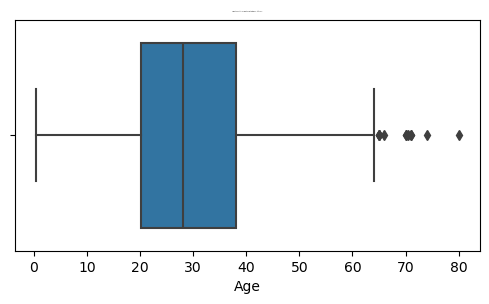

In [146]:
# Identificación de Datos faltante y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=1)

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

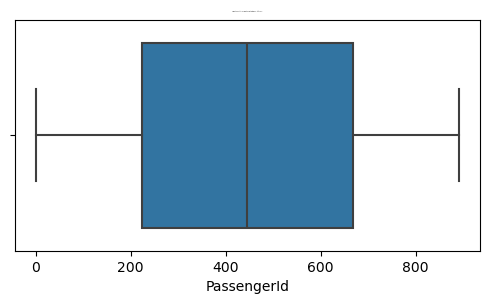

In [147]:
# Identificación de Datos faltante y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['PassengerId'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=1)

# 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [148]:
# Revisión de datos faltantes

print("Cantidad de registros con cero a nivel de PassengerId: ", data['PassengerId'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de Survived: ", data['Survived'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de Pclass: ", data['Pclass'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de Age: ", data['Age'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de SibSp: ", data['SibSp'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de Parch: ", data['Parch'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de FareFare: ", data['Fare'].isin([0]).sum())

Cantidad de registros con cero a nivel de PassengerId:  0
Cantidad de registros con cero a nivel de Survived:  549
Cantidad de registros con cero a nivel de Pclass:  0
Cantidad de registros con cero a nivel de Age:  0
Cantidad de registros con cero a nivel de SibSp:  608
Cantidad de registros con cero a nivel de Parch:  678
Cantidad de registros con cero a nivel de FareFare:  15


In [149]:
# Reemplazar todos los ceros con el valor medio (promedio de la columna)

data['PassengerId']=data['PassengerId'].replace(0,data['PassengerId'].mean())
data['Survived']=data['Survived'].replace(0,data['Survived'].mean())
data['Pclass']=data['Pclass'].replace(0,data['Pclass'].mean())
data['Age']=data['Age'].replace(0,data['Age'].mean())
data['SibSp']=data['SibSp'].replace(0,data['SibSp'].mean())
data['Parch']=data['Parch'].replace(0,data['Parch'].mean())
data['Fare']=data['Fare'].replace(0,data['Fare'].mean())

In [150]:
# Revisión de datos faltantes para verificar que no se tiene datos faltantes

print("Cantidad de registros con cero a nivel de PassengerId: ", data['PassengerId'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de Survived: ", data['Survived'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de Pclass: ", data['Pclass'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de Age: ", data['Age'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de SibSp: ", data['SibSp'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de Parch: ", data['Parch'].isin([0]).sum())
print("Cantidad de registros con cero a nivel de FareFare: ", data['Fare'].isin([0]).sum())

Cantidad de registros con cero a nivel de PassengerId:  0
Cantidad de registros con cero a nivel de Survived:  0
Cantidad de registros con cero a nivel de Pclass:  0
Cantidad de registros con cero a nivel de Age:  0
Cantidad de registros con cero a nivel de SibSp:  0
Cantidad de registros con cero a nivel de Parch:  0
Cantidad de registros con cero a nivel de FareFare:  0


IndexError: index 4 is out of bounds for axis 0 with size 4

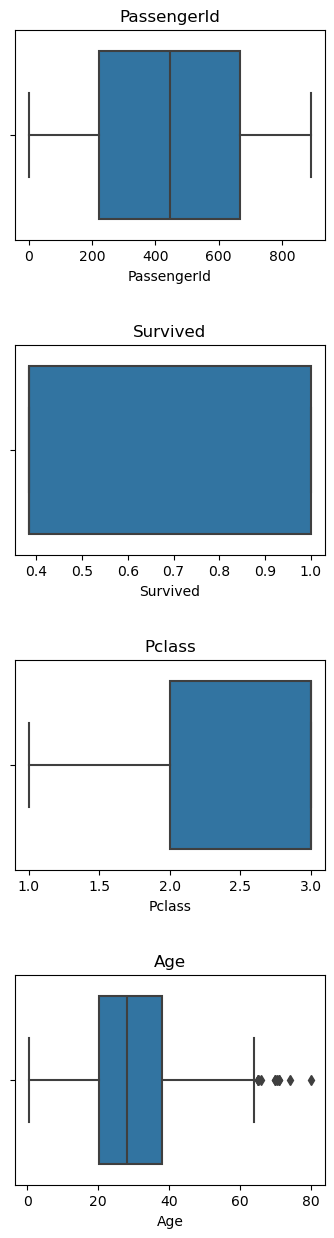

In [151]:
# Identificación de datos Atípicos

columns_num = ['PassengerId','Survived','Pclass','Age', 'SibSp', 'Parch', 'FareFare']

fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(4,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(columns_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

In [ ]:
# Verificación de valores nulos

data.isnull().sum()


In [152]:
# Imputar valores nulos en 'Age' con la mediana por 'Pclass' y 'Sex'

data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [153]:
# Se elimina datos de Embarked y Cabin
data = data.drop(columns=['Cabin'])
data = data.drop(columns=['Embarked'])

In [154]:
# Verificación de valores nulos

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [155]:
# Modificamos los valores de del sex para mayor valoración 

sex_id = {'male': 0, 'female': 1}
data['Sex'] = data['Sex'].map(sex_id)

In [156]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0.383838,3,"Braund, Mr. Owen Harris",0,22.0,1.000000,0.381594,A/5 21171,7.2500
1,2,1.000000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.000000,0.381594,PC 17599,71.2833
2,3,1.000000,3,"Heikkinen, Miss. Laina",1,26.0,0.523008,0.381594,STON/O2. 3101282,7.9250
3,4,1.000000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.000000,0.381594,113803,53.1000
4,5,0.383838,3,"Allen, Mr. William Henry",0,35.0,0.523008,0.381594,373450,8.0500


# 3. Seleccionar las características más relevantes para entrenar al modelo

* Característica de interés: Survived
* Características para entrenar el modelo: Pclass, Sex, Age, Fare

In [157]:
data['Survived'].value_counts()
#0 = no sobrevivió
#1 = sobrevivió

Survived
0.383838    549
1.000000    342
Name: count, dtype: int64

In [158]:
relevant_columns = ['Survived','Pclass', 'Age', 'Sex', 'Fare']
relevant_columns = data.loc[:, relevant_columns]

relevant_columns.head()

,Survived,Pclass,Age,Sex,Fare
0,0.383838,3,22.0,0,7.2500
1,1.000000,1,38.0,1,71.2833
2,1.000000,3,26.0,1,7.9250
3,1.000000,1,35.0,1,53.1000
4,0.383838,3,35.0,0,8.0500


C:\Users\jhon.orozco\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\jhon.orozco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhon.orozco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jhon.orozco\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before ope

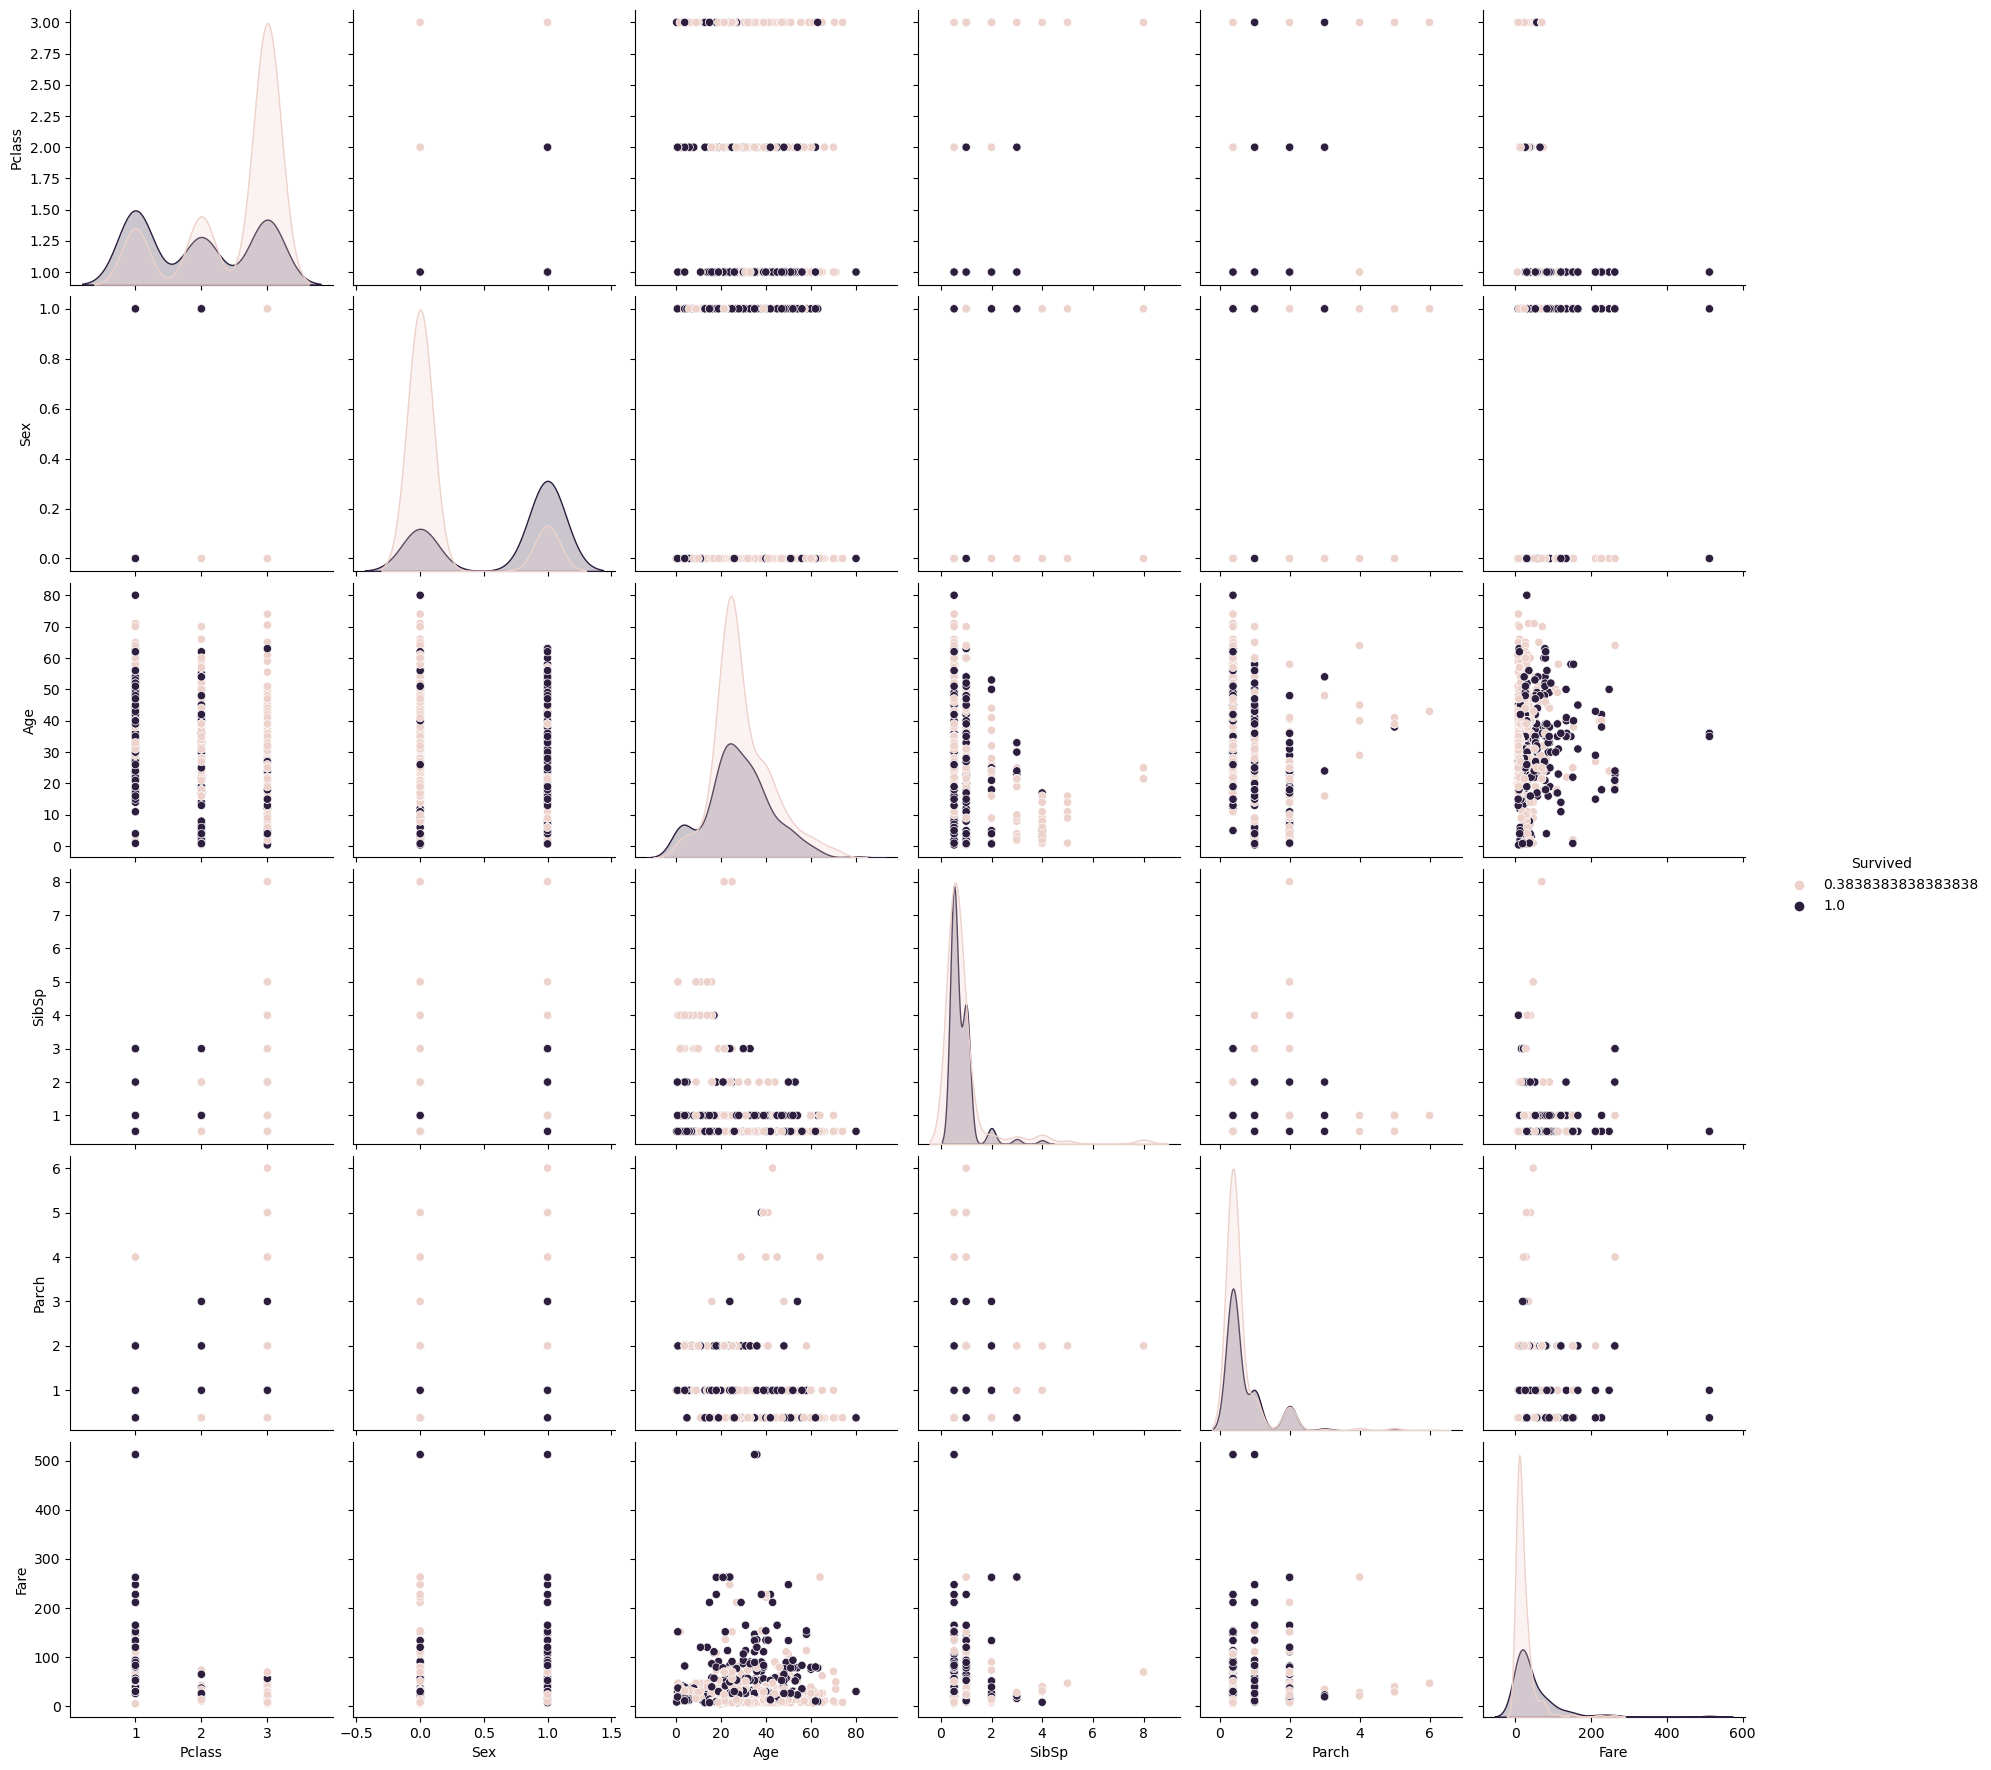

In [183]:
sns.pairplot(data.drop('PassengerId', axis=1), size=3,kind='scatter', hue='Survived')
plt.show()

# 4. Dividir el dataset en Train y Test para evaluar correctamente el


In [159]:
relevant_columns = relevant_columns.dropna()

# Separar características y variable objetivo
X = relevant_columns.drop('Survived', axis=1)
Y = relevant_columns['Survived']

# Asegurarse de que Y sea categórico
Y = Y.astype(int)


In [160]:
# Convertir variables categóricas a numéricas
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

In [161]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

In [162]:
print(X_train)

     Pclass   Age     Fare  Sex_1
671       1  31.0  52.0000  False
417       2  18.0  13.0000   True
634       3   9.0  27.9000   True
323       2  22.0  29.0000   True
379       3  19.0   7.7750  False
..      ...   ...      ...    ...
131       3  20.0   7.0500  False
490       3  25.0  19.9667  False
528       3  39.0   7.9250  False
48        3  25.0  21.6792  False
80        3  22.0   9.0000  False

[668 rows x 4 columns]


In [163]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int32


# 5. Entrenar el modelo configurando los diferentes hiperparámetros


In [164]:
# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver='liblinear')
modelo_regresion.fit(X_train, Y_train)


LogisticRegression(solver='liblinear')

In [165]:
# Crear el modelo de predicción
Prediccion = modelo_regresion.predict(X_test)
print(Prediccion)

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


# 6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc


In [166]:
from sklearn.metrics import accuracy_score, classification_report

# Imprimir el accuracy
print("Accuracy:", accuracy_score(Y_test, Prediccion))

# Imprimir el classification report
print(classification_report(Y_test,Prediccion))

Accuracy: 0.7937219730941704
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       137
           1       0.77      0.66      0.71        86

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



# 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

Text(0, 0.5, 'Prediccion')

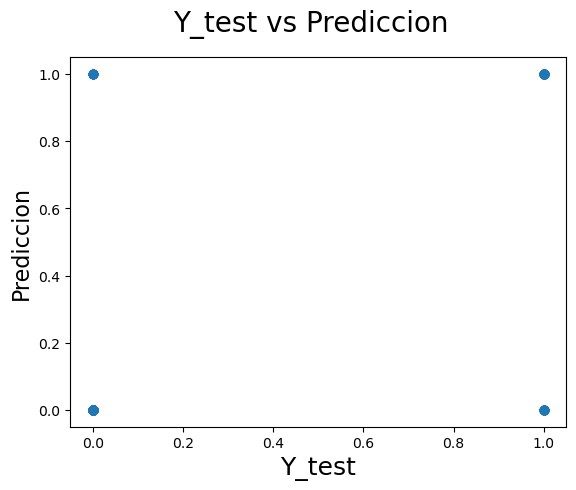

In [181]:
# Trazar y_test e y_pred para comprender la propagación.

fig = plt.figure()
plt.scatter(Y_test,Prediccion)
fig.suptitle('Y_test vs Prediccion', fontsize=20)              # Título de la trama
plt.xlabel('Y_test', fontsize=18)                          # X-label
plt.ylabel('Prediccion', fontsize=16) 

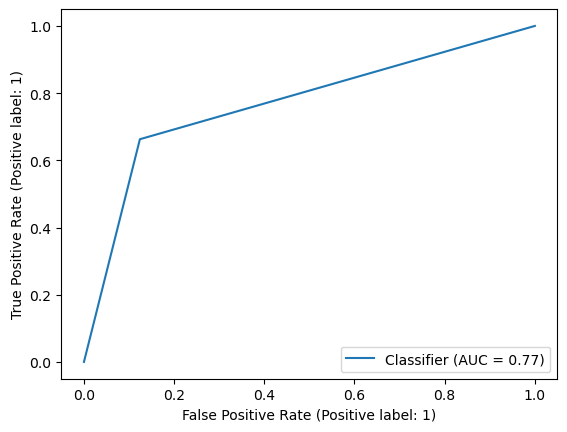

In [179]:
RocCurveDisplay.from_predictions(Y_test,Prediccion)
plt.show()